In [1]:
#참고1 : https://www.kaggle.com/code/kongnyooong/bike-sharing-demand-for-korean-beginners/notebook
#참고2 : https://didu-story.tistory.com/43?category=937100

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns  
import matplotlib.pylab as plt

train = pd.read_csv('../input/bike-sharing-demand/train.csv')
test = pd.read_csv('../input/bike-sharing-demand/test.csv')
submission = pd.read_csv('../input/bike-sharing-demand/sampleSubmission.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


count(number of total rentals) = casual(number of non-registered user rentals initiated) + registered(number of registered user rentals initiated)

In [3]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Test file doesn't have 'casual', 'registerd' columns, so when i trained train file, this columns can be dropped.


In [4]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


you must be predict count column

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


transform datetime column(object type) to datetime

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


transform datetime column(object type) to datetime

In [7]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


In [8]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [11]:
#EDA
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [13]:
def feature_engineering(data):
    data['year'] = data['datetime'].dt.year
    data['month'] = data['datetime'].dt.month
    data['day'] = data['datetime'].dt.day
    data['hour'] = data['datetime'].dt.hour
    data['minute'] = data['datetime'].dt.minute
    data['second'] = data['datetime'].dt.second
    data['dayofweek'] = data['datetime'].dt.dayofweek
    return data

Mon(0),Tue(1),Wed(2),Thu(3),Fri(4),Sat(5),Sun(6)

In [14]:
train = feature_engineering(train)
test = feature_engineering(test)

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [16]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


<Axes: xlabel='season', ylabel='count'>

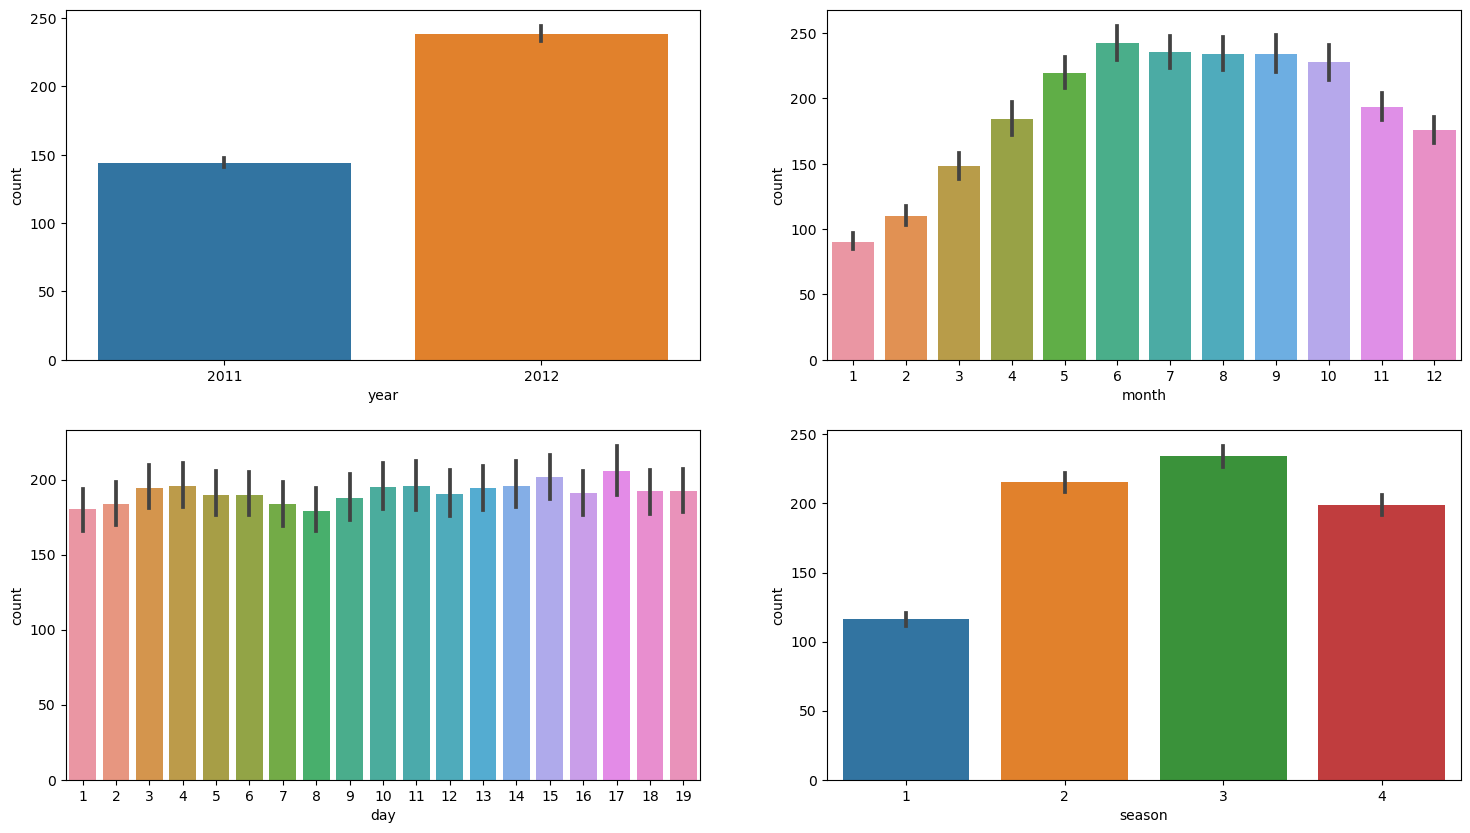

In [17]:
figure, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(18,10)
sns.barplot(data = train, x = 'year', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'month', y = 'count', ax = ax2)
sns.barplot(data = train, x = 'day', y = 'count', ax = ax3)
sns.barplot(data = train, x = 'season', y = 'count', ax = ax4)

In [18]:
#YEAR는 자료가 부족하여 사용하기 어렵다.
#MONTH는 6월부터 9월까지 가장 높고 1월부터 2월이 가장 적다.
#DAY는 크게 특징점이 없음
#SEASON는 여름, 가을에 높고 봄에 가장 적다.
#보통 1월 ~ 2월이면 겨울로 취급하는데 이때 MONTH는 가장 적고 SEASON 겨울은 적지 않다.

In [19]:
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


<Axes: xlabel='hour', ylabel='count'>

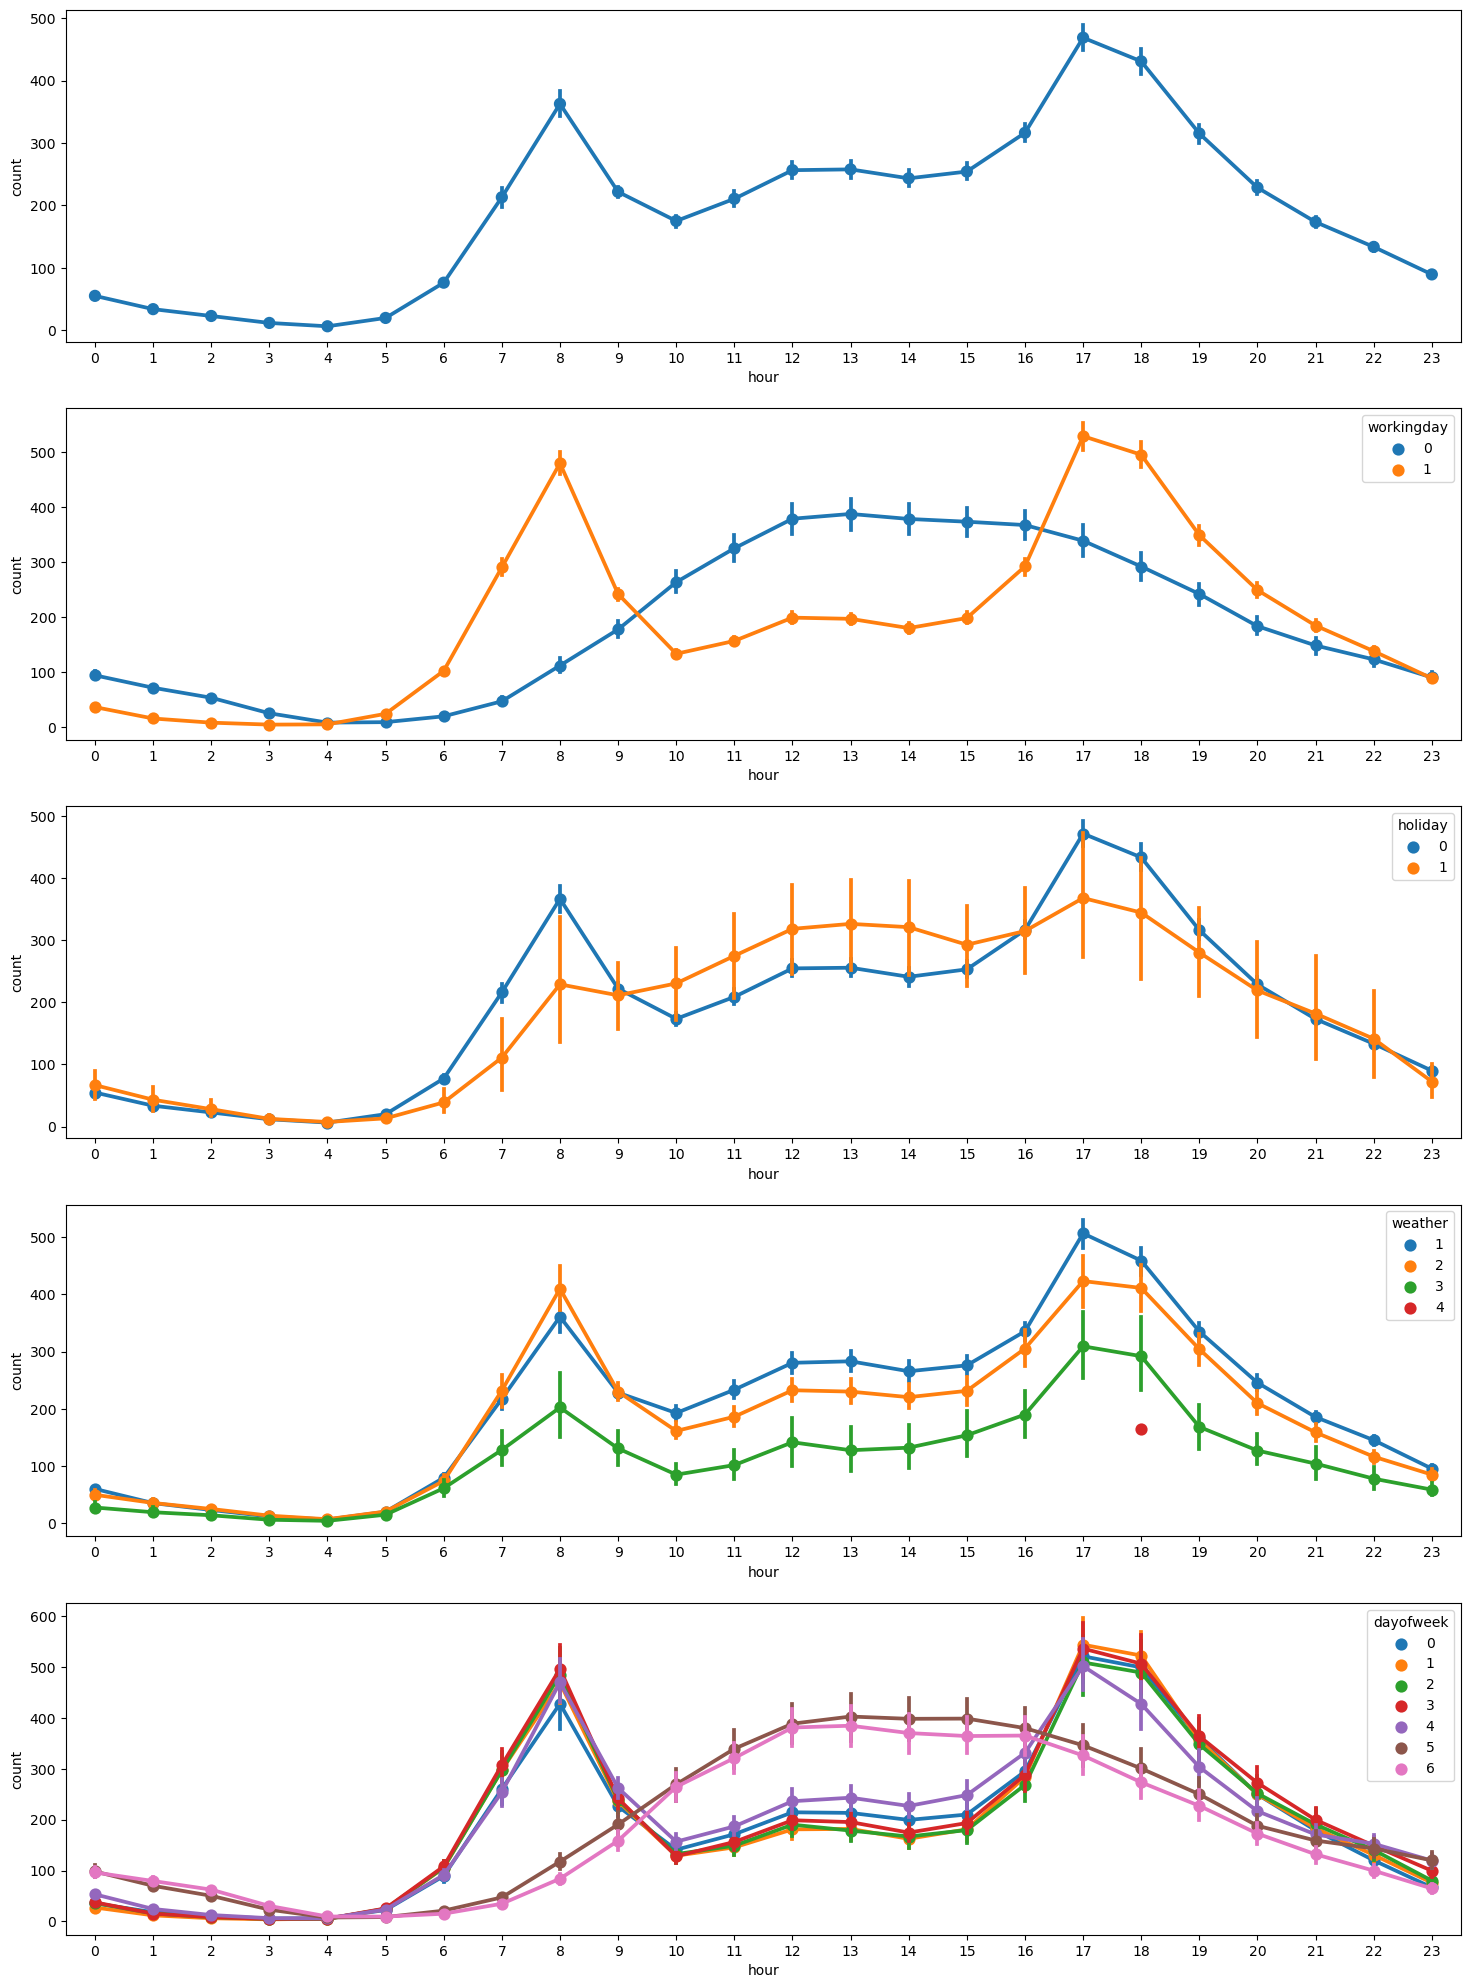

In [20]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax3)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax4)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax5)

In [21]:
# 8시와 17시가 가장 높은데 이때는 보통 출퇴근시간이다.
#1 : workingday, 0 : non_working_day / 근무일이 아닌 날은 완만하게 증가하며 오후에 최대가된다.
#1 : holiday, 0 : working_day / 휴무일에 완만하게 증가하며 오후에 최대가된다.
#1: Clear, 2: Mist, 3: Light Snow, Light Rain, 4: Heavy Rain + Ice Pallets
# 평일은 출퇴근시간에 많이타며,주말은 13시까지 완만하게 증가하고 13시 이후 완만하게 감소한다.
# 지금까지 요소들은 제쇠된 요소에 대하여 1 ~ 4가지 값만 존재 했다.

/tmp/ipykernel_20/154294254.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_data.corr(), linewidths = 0.1, square = True, annot = True, cmap = colormap)


<Axes: >

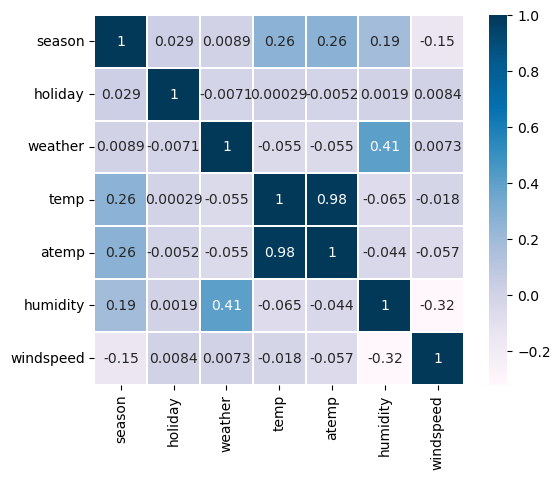

In [22]:
# 지금부터는 다양한 독립적인 값들이 있어서 분포도 확인이 필수적이다.
corr_data = train[['datetime', 'season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
colormap = plt.cm.PuBu
sns.heatmap(corr_data.corr(), linewidths = 0.1, square = True, annot = True, cmap = colormap)

In [23]:
#temp와 atemp는 거의 동일하므로 둘 중 하나만 사용해도 충분하다.

<Axes: xlabel='humidity', ylabel='count'>

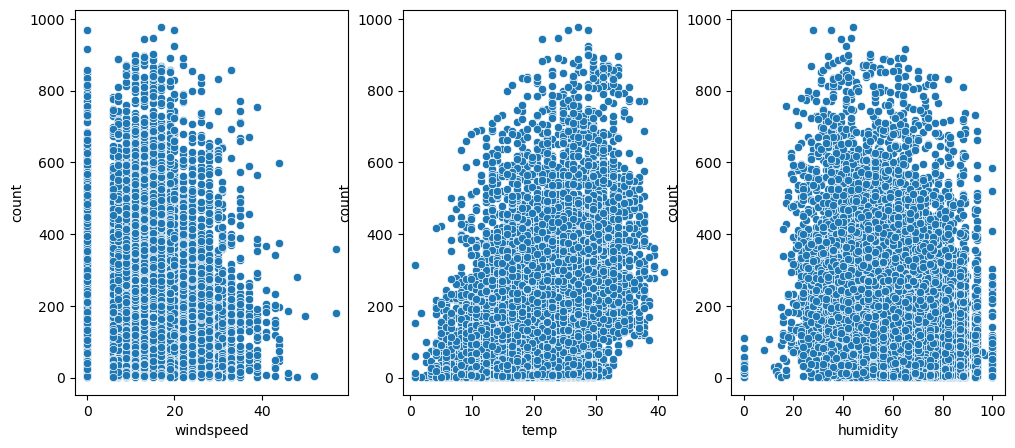

In [24]:
#이상치 제거
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))
sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = train, x = 'temp', y = 'count', ax = ax2)
sns.scatterplot(data = train, x = 'humidity', y =  'count', ax = ax3)

In [25]:
#풍속이 0인 경우는 거의 없는데 상당히 많다.

<Axes: title={'center': 'test windspeed'}, xlabel='windspeed', ylabel='count'>

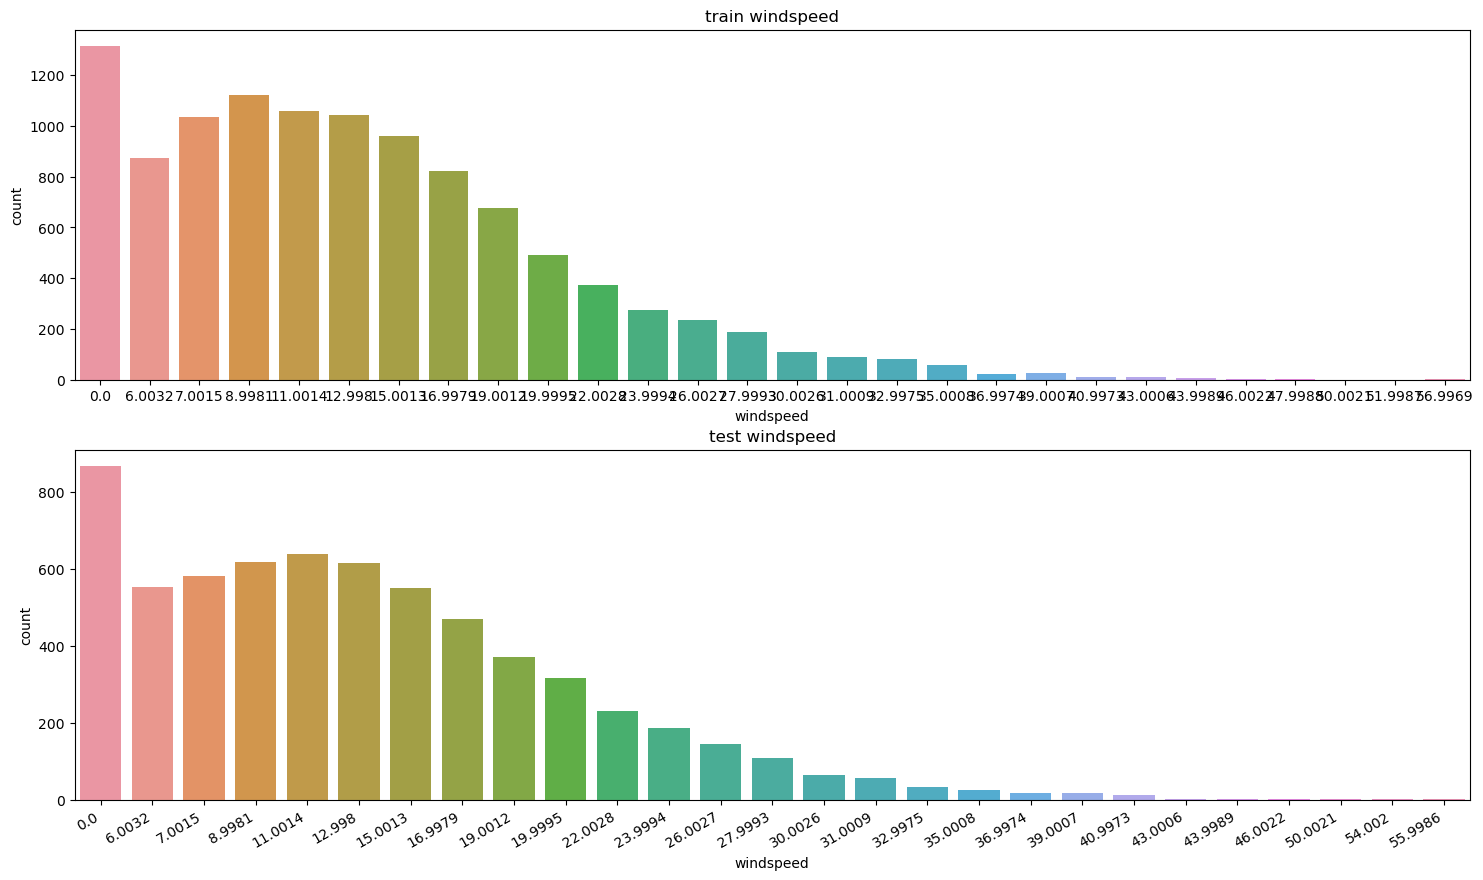

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,10))

plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "train windspeed")
sns.countplot(data = train, x = "windspeed", ax = ax1)

plt.xticks(rotation = 30, ha = "right")
ax2.set(ylabel = "count", title = "test windspeed")
sns.countplot(data = test, x = "windspeed", ax = ax2)

In [27]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)
test["year_month"] = test["datetime"].apply(concatenate_year_month) 

<Axes: xlabel='year_month', ylabel='count'>

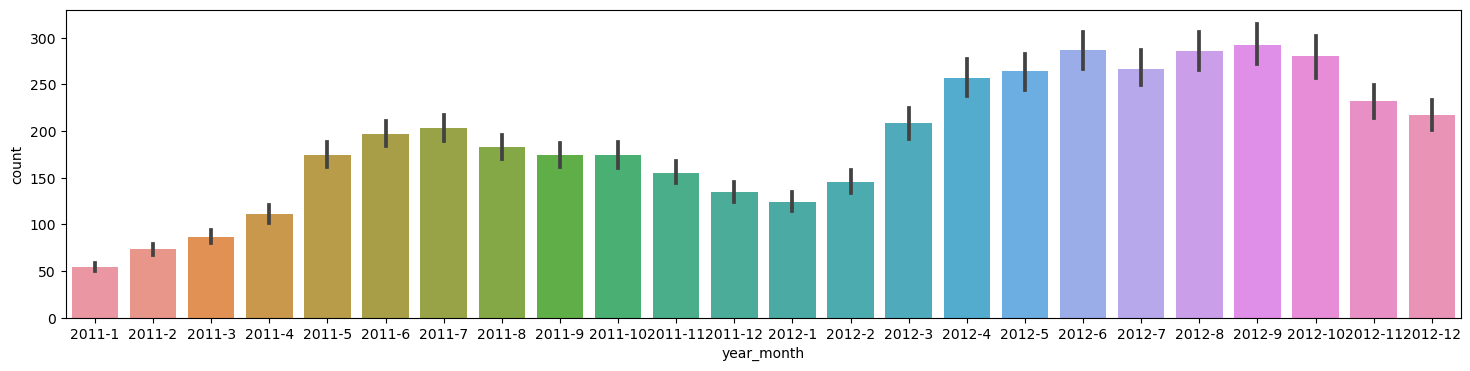

In [28]:
fig, ax = plt.subplots(figsize = (18,4))
sns.barplot(data = train, y = "count", x = "year_month")

In [29]:
#전체 데이터를 오름차순으로 정리한 후, 정확히 4등분(25%, 50%, 75%, 100%)
#25% ~ 75% 부근 데이터를 추출함

from collections import Counter 

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers

In [30]:
Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [31]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [32]:
train.shape

(10846, 20)

In [33]:
train_num = train[["count", "temp", "atemp", "casual", "registered", "humidity", "windspeed"]]

In [34]:
# 첨도(Skewness) : 분포의 비대칭도를 나타내는 통계량, 정규분포, T분포와 같이 대칭인 분포의 경우 왜도가 0
# 왜도(Kurtosis) : 분포의 꼬리부분의 길이와 중앙부분의 뾰족함에 대한 정보를 제공하는 통계량, 정규분포의 첨도는 0이다

for col in train_num:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

count           Skewness: 01.21     Kurtosis: 001.20
temp            Skewness: 00.01     Kurtosis: -00.91
atemp           Skewness: -0.10     Kurtosis: -00.85
casual          Skewness: 02.52     Kurtosis: 007.74
registered      Skewness: 01.51     Kurtosis: 002.61
humidity        Skewness: -0.09     Kurtosis: -00.76
windspeed       Skewness: 00.58     Kurtosis: 000.63


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental count by minute')]

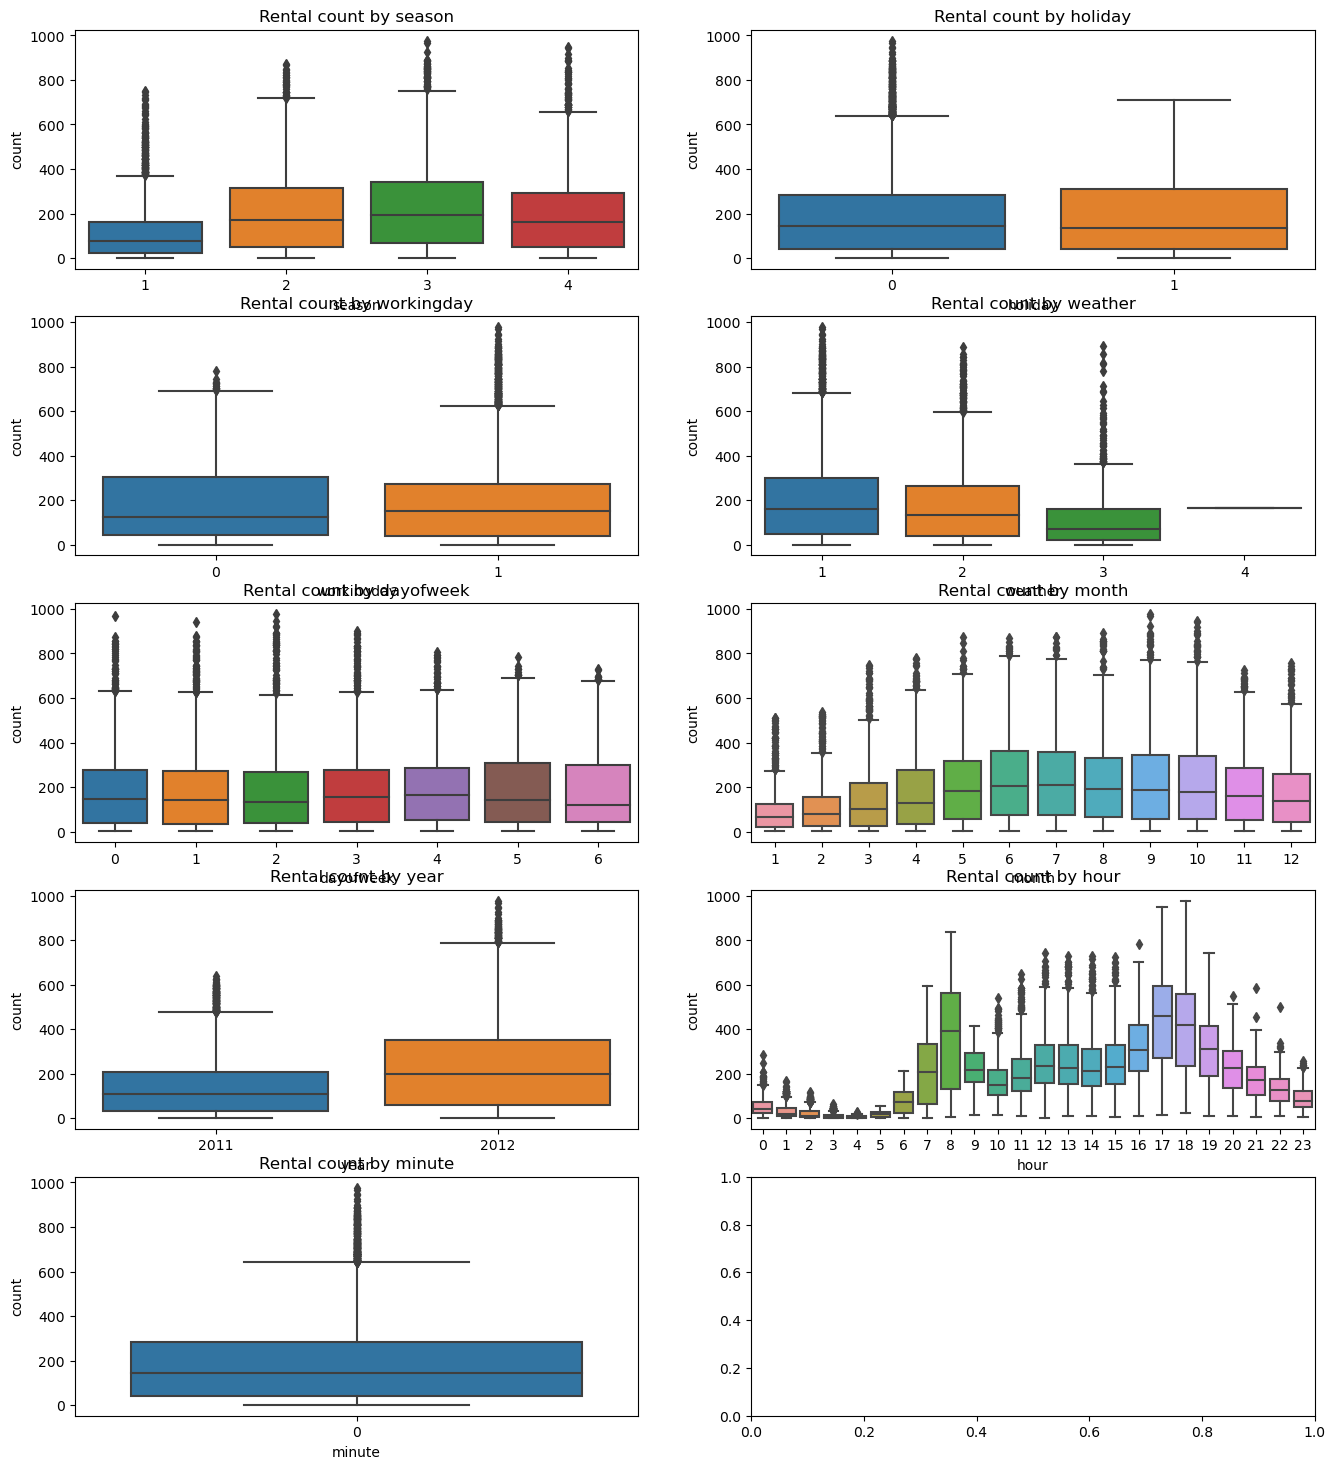

In [35]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 18))
sns.boxplot(data = train, y="count", x = "season", orient = "v", ax = axes[0][0])
sns.boxplot(data = train, y="count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = train, y="count", x = "workingday", orient = "v", ax = axes[1][0])
sns.boxplot(data = train, y="count", x = "weather", orient = "v", ax = axes[1][1])
sns.boxplot(data = train, y="count", x = "dayofweek", orient = "v", ax = axes[2][0])
sns.boxplot(data = train, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = train, y="count", x = "year", orient = "v", ax = axes[3][0])
sns.boxplot(data = train, y="count", x = "hour", orient = "v", ax = axes[3][1])
sns.boxplot(data = train, y="count", x = "minute", orient = "v", ax = axes[4][0])

axes[0][0].set(ylabel = "count", title = "Rental count by season")
axes[0][1].set(ylabel = "count", title = "Rental count by holiday")
axes[1][0].set(ylabel = "count", title = "Rental count by workingday")
axes[1][1].set(ylabel = "count", title = "Rental count by weather")
axes[2][0].set(ylabel = "count", title = "Rental count by dayofweek")
axes[2][1].set(ylabel = "count", title = "Rental count by month")
axes[3][0].set(ylabel = "count", title = "Rental count by year")
axes[3][1].set(ylabel = "count", title = "Rental count by hour")
axes[4][0].set(ylabel = "count", title = "Rental count by minute")

In [36]:
#Maximum부근 Outliers 제거 => season hoilday workingday weather dayofweek month year hour
#minute는 특징점 없음

/tmp/ipykernel_20/3271752118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(train["count"], color = "b", label="Skewness: {:2f}".format(train["count"].skew()), ax=ax)


Skewness: 1.210923
Kurtosis: 1.200871


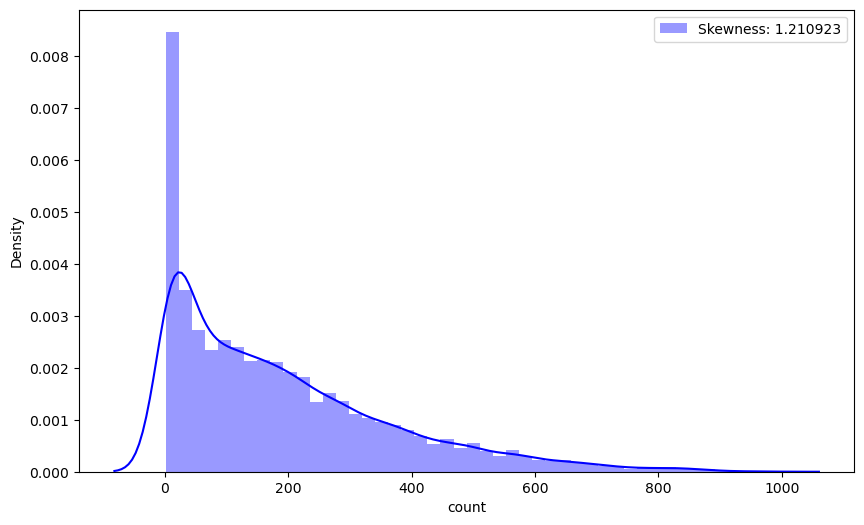

In [37]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(train["count"], color = "b", label="Skewness: {:2f}".format(train["count"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % train["count"].skew())
print("Kurtosis: %f" % train["count"].kurt())

In [38]:
#count 분포 차트 0 부근에 너무 치우침

/tmp/ipykernel_20/2337075261.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(train["count_Log"], color = "b", label="Skewness: {:2f}".format(train["count_Log"].skew()), ax=ax)


Skewness: -0.975198
Kurtosis: 0.247435


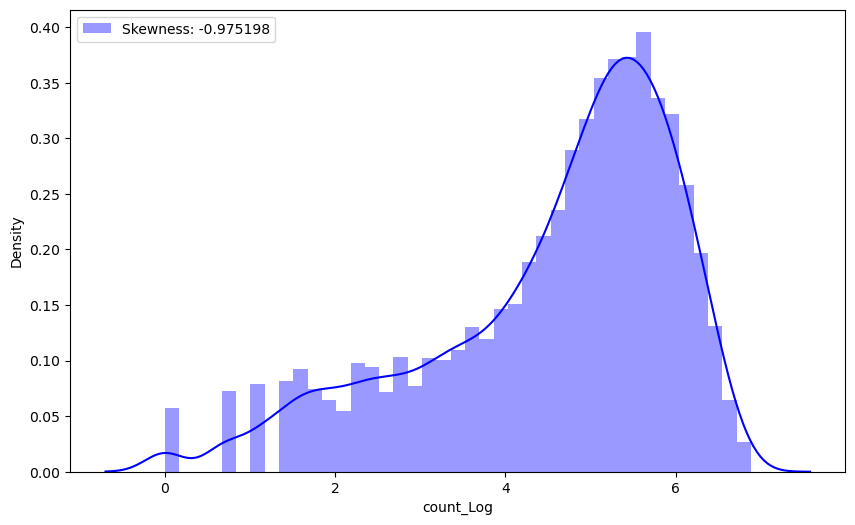

In [39]:
train["count_Log"] = train["count"].map(lambda i:np.log(i) if i>0 else 0)

f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(train["count_Log"], color = "b", label="Skewness: {:2f}".format(train["count_Log"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % train['count_Log'].skew())
print("Kurtosis: %f" % train['count_Log'].kurt())

train.drop('count', axis= 1, inplace=True)

In [40]:
#치우침 해소를 위해 로그를 취한다.

In [41]:
#0인 풍성을 0이 아닌 풍속을 통해 예측한다.
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    #풍속 변수의 0값 데이터들을 만져주기 위해 0인 값과 아닌 값들로 나눔
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    
    # 예측에 필요한 변수들을 지정합니다.
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"]
    
    # 풍속이 0이 아닌 값들을 string데이터로 변환합니다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    # 랜덤포레스트를 사용하여 wcol의 변수들로 0인 값들을 학습시키고 예측
    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"])
    wind0 = rf_wind.predict(X=dataWind0[wcol])
    
    # 예측한 값을 넣어줄 데이터프레임을 만듭니다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    # 예측값들을 넣어줍니다.
    predictWind0["windspeed"] = wind0
    
    # 0이 아닌 데이터들과 예측값들을 합쳐줍니다.
    data = predictWindNot0.append(predictWind0)
    
    # 풍속의 데이터들을 다시 float 타입으로 변환합니다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data

In [42]:
train = predict_windspeed(train)
test = predict_windspeed(test)

/tmp/ipykernel_20/2114279366.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
/tmp/ipykernel_20/2114279366.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictWind0["windspeed"] = wind0
/tmp/ipykernel_20/2114279366.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = predictWindNot0.append(predictWind0)
/tmp/ipykernel_20/2114279366.py

<Axes: xlabel='windspeed', ylabel='count'>

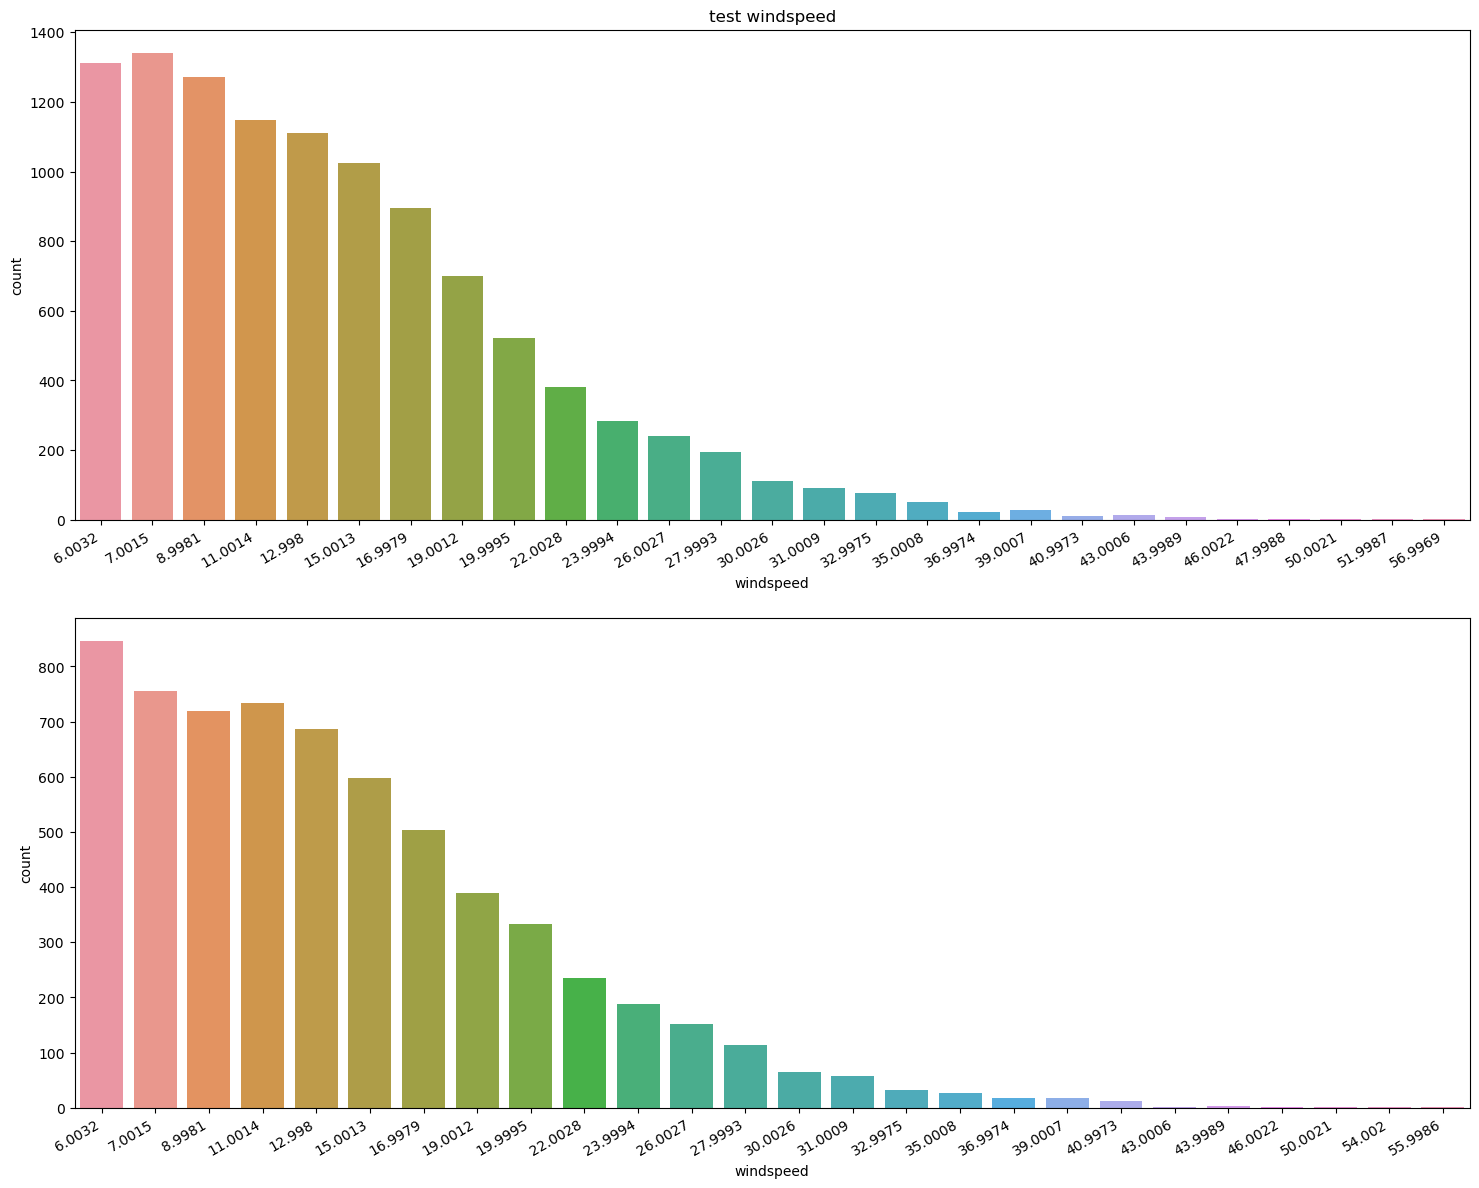

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,14))

plt.sca(ax1)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "train windspeed")
sns.countplot(data = train, x = "windspeed", ax = ax1)

plt.sca(ax2)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "test windspeed")
sns.countplot(data = test, x = "windspeed", ax = ax2)

# 예측된 풍속데이터 시각화, rotation은 글씨의 각도 조절 파라미

In [44]:
#one-hot-encoding
train = pd.get_dummies(train, columns = ["weather"], prefix = "weather")
test = pd.get_dummies(test, columns = ["weather"], prefix = "weather")

train = pd.get_dummies(train, columns = ["season"], prefix = "season")
test = pd.get_dummies(test, columns = ["season"], prefix = "season")

In [45]:
corr_data = train[["count_Log", "windspeed"]]
corr_data.corr()

,count_Log,windspeed
count_Log,1.000000,0.126858
windspeed,0.126858,1.000000


In [46]:
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,year,...,year_month,count_Log,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,2011-01-01 05:00:00,0,0,9.84,12.880,75,6.0032,0,1,2011,...,2011-1,0.000000,0,1,0,0,1,0,0,0
1,2011-01-01 10:00:00,0,0,15.58,19.695,76,16.9979,12,24,2011,...,2011-1,3.583519,1,0,0,0,1,0,0,0
2,2011-01-01 11:00:00,0,0,14.76,16.665,81,19.0012,26,30,2011,...,2011-1,4.025352,1,0,0,0,1,0,0,0
3,2011-01-01 12:00:00,0,0,17.22,21.210,77,19.0012,29,55,2011,...,2011-1,4.430817,1,0,0,0,1,0,0,0
4,2011-01-01 13:00:00,0,0,18.86,22.725,72,19.9995,47,47,2011,...,2011-1,4.543295,0,1,0,0,1,0,0,0


In [47]:
test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,...,dayofweek,year_month,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,2011,1,20,...,3,2011-1,1,0,0,0,1,0,0,0
1,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,2011,1,20,...,3,2011-1,1,0,0,0,1,0,0,0
2,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,2011,1,20,...,3,2011-1,1,0,0,0,1,0,0,0
3,2011-01-20 05:00:00,0,1,9.84,11.365,60,15.0013,2011,1,20,...,3,2011-1,1,0,0,0,1,0,0,0
4,2011-01-20 06:00:00,0,1,9.02,10.605,60,15.0013,2011,1,20,...,3,2011-1,1,0,0,0,1,0,0,0


In [48]:
#Modeling
#submission의 형태를 살펴보았을 때, datetime을 기준으로 예측값을 적엇다.
#따라서 test의 datetime은 미래의 submission 을 위해서 따로 저장해두기로 한다.

In [49]:
test_datetime = test['datetime']

train.drop(['datetime', 'workingday', 'atemp', 'registered', 'casual', 'minute', 'second', 'year_month'], axis = 1, inplace = True)
test.drop(['datetime', 'workingday', 'atemp', 'minute', 'second', 'year_month'], axis = 1, inplace = True) 

In [50]:
train.columns #19

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'dayofweek', 'count_Log', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')

In [51]:
test.columns #18

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')

In [52]:
##Gradient Boosting 모델 학습
#데이터셋 분할
from sklearn.model_selection import train_test_split
from sklearn import metrics

#데이터프레임 형태가 아닌 array 형태여야하기때문에 values를 취해줌
x_train = train.drop('count_Log', axis = 1).values
target_label = train['count_Log'].values
x_test = test.values

# train : val = 0.8 : 0.2 로 split
x_train, x_val, y_train, y_val = train_test_split(x_train, target_label, test_size = 0.2, random_state = 2000)

In [53]:
#모델링 및 학습

from sklearn.ensemble import GradientBoostingRegressor

#n_estimator = 트리의 수
#max_depth = 트리의 깊이
#max_features = 나누는 수
#Learing rate = 학습

regressor = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05, max_depth = 5, min_samples_leaf = 15, min_samples_split = 10
, random_state = 42)

#model.fit(x, y)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

In [54]:
#모델 성능 평가

score_train = regressor.score(x_train, y_train)
score_val = regressor.score(x_val, y_val)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.986872
validation score: 0.953844


In [55]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [56]:
#예측
pred = regressor.predict(x_test)

#파일 생성
submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count_log'] = pred

submission['count'] = np.exp(submission['count_log'])
    
submission.drop('count_log', axis = 1, inplace = True)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.914554
1,2011-01-20 03:00:00,2.284107
2,2011-01-20 04:00:00,2.166746
3,2011-01-20 05:00:00,6.174507
4,2011-01-20 06:00:00,31.123145


In [57]:
submission.to_csv('../bike_Submission.csv', index = False)